# Modeling
In this notebook, we'll be modeling the data we've previously prepared. Out notebook will be laid out as follows:

1. Model Selection & Generation
2. Hyperparameter Optimization
3. Fine-Tuning (if needed)
4. Reporting Best Model(s) + Settings
5. Interpretation
6. Conclusion

Our eventual goal here is two-fold:

1. Accurately [and fairly] model the diabetes dataset
2. Interpret the results to find something worth recommending to those wanting to reduce risk of diabetes. This can be via LIME/SHAP (i.e. some interpretable model that approximates the neural network) or via analyzing a more simple model's structure (i.e. regression coefficients, random forest decision boundaries)

In [1]:
# Environment Setup
from utils.model import *
from utils.dataset import *

***
## Model Selection & Generation

<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]


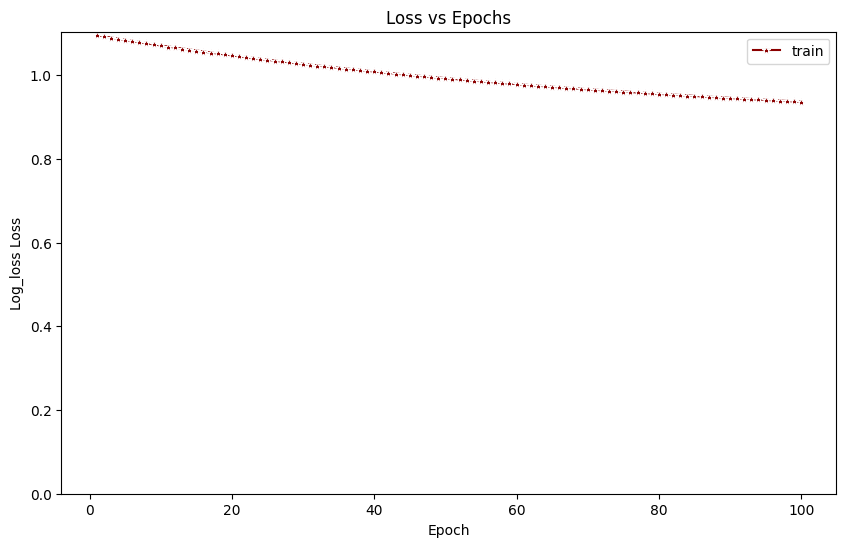

/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



<Test Report>
Precision: [no diabetes] 0.9407131011608624, [pre-diabetes] 0.34125237191650853, [diabetes] 0.02788074133763094
Recall: [no diabetes] 0.6901335953768045, [pre-diabetes] 0.6360164096760503, [diabetes] 0.18682505399568033
F1-Score: [no diabetes] 0.7961725845850709, [pre-diabetes] 0.4441809918988342, [diabetes] 0.048520544103211334
Support: [no diabetes] 42741, [pre-diabetes] 7069, [diabetes] 926
Accuracy: 67.3407%
Macro-F1: 0.4296


100%|██████████| 8014/8014 [00:28<00:00, 281.75it/s]


Epoch 1/50, Loss: 1.1880, Test Loss: 5.2761


100%|██████████| 8014/8014 [00:28<00:00, 282.87it/s]


Epoch 2/50, Loss: 1.0196, Test Loss: 5.8621


100%|██████████| 8014/8014 [00:28<00:00, 282.68it/s]


Epoch 3/50, Loss: 1.0069, Test Loss: 5.6684


100%|██████████| 8014/8014 [00:28<00:00, 283.64it/s]


Epoch 4/50, Loss: 1.0013, Test Loss: 5.8487


100%|██████████| 8014/8014 [00:28<00:00, 282.13it/s]


Epoch 5/50, Loss: 0.9979, Test Loss: 5.9842


100%|██████████| 8014/8014 [00:28<00:00, 282.43it/s]


Epoch 6/50, Loss: 0.9959, Test Loss: 5.7535


100%|██████████| 8014/8014 [00:28<00:00, 282.52it/s]


Epoch 7/50, Loss: 0.9949, Test Loss: 5.3994


100%|██████████| 8014/8014 [00:28<00:00, 281.87it/s]


Epoch 8/50, Loss: 0.9933, Test Loss: 5.1733


100%|██████████| 8014/8014 [00:28<00:00, 283.65it/s]


Epoch 9/50, Loss: 0.9927, Test Loss: 5.2235


100%|██████████| 8014/8014 [00:28<00:00, 276.53it/s]


Epoch 10/50, Loss: 0.9925, Test Loss: 4.8840


100%|██████████| 8014/8014 [00:28<00:00, 281.19it/s]


Epoch 11/50, Loss: 0.9912, Test Loss: 4.6155


100%|██████████| 8014/8014 [00:28<00:00, 281.82it/s]


Epoch 12/50, Loss: 0.9905, Test Loss: 4.8067


100%|██████████| 8014/8014 [00:28<00:00, 282.51it/s]


Epoch 13/50, Loss: 0.9906, Test Loss: 4.2280


100%|██████████| 8014/8014 [00:28<00:00, 283.62it/s]


Epoch 14/50, Loss: 0.9894, Test Loss: 4.3960


100%|██████████| 8014/8014 [00:28<00:00, 282.32it/s]


Epoch 15/50, Loss: 0.9890, Test Loss: 4.1108


100%|██████████| 8014/8014 [00:28<00:00, 283.09it/s]


Epoch 16/50, Loss: 0.9887, Test Loss: 3.9188


100%|██████████| 8014/8014 [00:28<00:00, 282.00it/s]


Epoch 17/50, Loss: 0.9889, Test Loss: 3.8276


100%|██████████| 8014/8014 [00:28<00:00, 283.33it/s]


Epoch 18/50, Loss: 0.9878, Test Loss: 3.7304


100%|██████████| 8014/8014 [00:28<00:00, 282.15it/s]


Epoch 19/50, Loss: 0.9880, Test Loss: 3.5973


100%|██████████| 8014/8014 [00:28<00:00, 283.22it/s]


Epoch 20/50, Loss: 0.9880, Test Loss: 3.6698


100%|██████████| 8014/8014 [00:28<00:00, 282.64it/s]


Epoch 21/50, Loss: 0.9871, Test Loss: 3.5341


100%|██████████| 8014/8014 [00:28<00:00, 282.59it/s]


Epoch 22/50, Loss: 0.9868, Test Loss: 3.4913


100%|██████████| 8014/8014 [00:28<00:00, 284.29it/s]


Epoch 23/50, Loss: 0.9865, Test Loss: 3.3654


100%|██████████| 8014/8014 [00:28<00:00, 282.64it/s]


Epoch 24/50, Loss: 0.9861, Test Loss: 3.2951


100%|██████████| 8014/8014 [00:28<00:00, 284.30it/s]


Epoch 25/50, Loss: 0.9866, Test Loss: 3.3430


100%|██████████| 8014/8014 [00:28<00:00, 283.02it/s]


Epoch 26/50, Loss: 0.9866, Test Loss: 3.1438


100%|██████████| 8014/8014 [00:28<00:00, 282.11it/s]


Epoch 27/50, Loss: 0.9861, Test Loss: 3.4334


100%|██████████| 8014/8014 [00:29<00:00, 271.21it/s]


Epoch 28/50, Loss: 0.9864, Test Loss: 3.1903


100%|██████████| 8014/8014 [00:29<00:00, 269.58it/s]


Epoch 29/50, Loss: 0.9851, Test Loss: 2.9499


100%|██████████| 8014/8014 [00:28<00:00, 281.64it/s]


Epoch 30/50, Loss: 0.9850, Test Loss: 2.6729


100%|██████████| 8014/8014 [00:28<00:00, 277.70it/s]


Epoch 31/50, Loss: 0.9855, Test Loss: 3.0481


100%|██████████| 8014/8014 [00:28<00:00, 283.07it/s]


Epoch 32/50, Loss: 0.9850, Test Loss: 2.9646


100%|██████████| 8014/8014 [00:28<00:00, 281.98it/s]


Epoch 33/50, Loss: 0.9842, Test Loss: 2.7911


100%|██████████| 8014/8014 [00:28<00:00, 279.28it/s]


Epoch 34/50, Loss: 0.9851, Test Loss: 2.6948


100%|██████████| 8014/8014 [00:28<00:00, 277.13it/s]


Epoch 35/50, Loss: 0.9845, Test Loss: 2.7273


100%|██████████| 8014/8014 [00:28<00:00, 281.09it/s]


Epoch 36/50, Loss: 0.9845, Test Loss: 2.7496


100%|██████████| 8014/8014 [00:28<00:00, 281.72it/s]


Epoch 37/50, Loss: 0.9833, Test Loss: 2.9218


100%|██████████| 8014/8014 [00:28<00:00, 279.54it/s]


Epoch 38/50, Loss: 0.9838, Test Loss: 2.6328


100%|██████████| 8014/8014 [00:28<00:00, 281.72it/s]


Epoch 39/50, Loss: 0.9837, Test Loss: 2.5181


100%|██████████| 8014/8014 [00:28<00:00, 282.64it/s]


Epoch 40/50, Loss: 0.9838, Test Loss: 2.4241


100%|██████████| 8014/8014 [00:27<00:00, 286.34it/s]


Epoch 41/50, Loss: 0.9826, Test Loss: 2.4634


100%|██████████| 8014/8014 [00:28<00:00, 282.81it/s]


Epoch 42/50, Loss: 0.9836, Test Loss: 2.5794


100%|██████████| 8014/8014 [00:28<00:00, 283.41it/s]


Epoch 43/50, Loss: 0.9832, Test Loss: 2.4185


100%|██████████| 8014/8014 [00:28<00:00, 283.09it/s]


Epoch 44/50, Loss: 0.9823, Test Loss: 2.3837


100%|██████████| 8014/8014 [00:28<00:00, 285.94it/s]


Epoch 45/50, Loss: 0.9826, Test Loss: 2.3695


100%|██████████| 8014/8014 [00:28<00:00, 284.24it/s]


Epoch 46/50, Loss: 0.9829, Test Loss: 2.4369


100%|██████████| 8014/8014 [00:28<00:00, 283.18it/s]


Epoch 47/50, Loss: 0.9823, Test Loss: 2.1933


100%|██████████| 8014/8014 [00:28<00:00, 283.08it/s]


Epoch 48/50, Loss: 0.9816, Test Loss: 2.4376


100%|██████████| 8014/8014 [00:28<00:00, 284.05it/s]


Epoch 49/50, Loss: 0.9815, Test Loss: 2.2997


100%|██████████| 8014/8014 [00:28<00:00, 284.45it/s]


Epoch 50/50, Loss: 0.9824, Test Loss: 2.1572


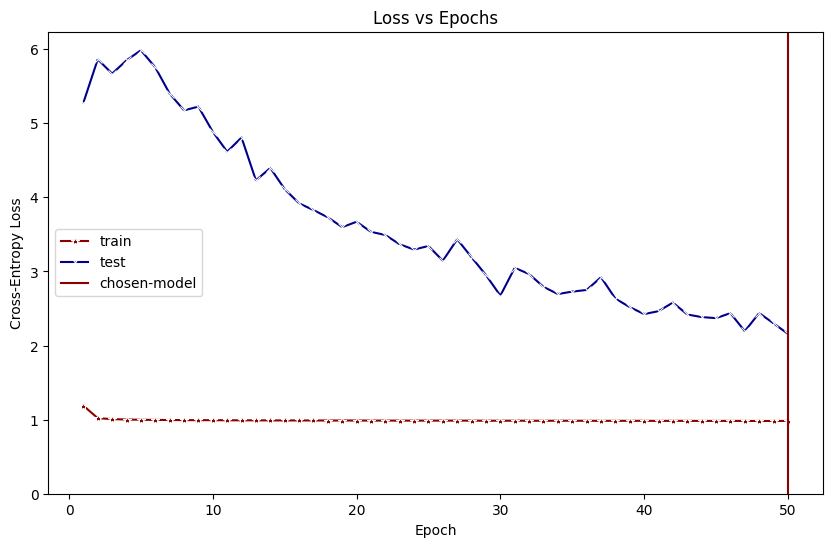

/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



<Test Report>
Precision: [no diabetes] 0.8927405919806477, [pre-diabetes] 0.04063373718546132, [diabetes] 0.5721649484536082
Recall: [no diabetes] 0.9152570131723637, [pre-diabetes] 0.23542116630669546, [diabetes] 0.12561889942000282
F1-Score: [no diabetes] 0.9038585951940851, [pre-diabetes] 0.06930535685900492, [diabetes] 0.20600858369098712
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 79.2830%
Macro-F1: 0.3931
Epoch 1, change: 1.00000000
Epoch 2, change: 0.25225974
Epoch 3, change: 0.13470629
Epoch 4, change: 0.09814960
Epoch 5, change: 0.05012524
Epoch 6, change: 0.02037335
Epoch 7, change: 0.01588300
Epoch 8, change: 0.00989571
Epoch 9, change: 0.00782193
Epoch 10, change: 0.00618506
Epoch 11, change: 0.00414319
Epoch 12, change: 0.00409114
Epoch 13, change: 0.00379375
Epoch 14, change: 0.00350049
Epoch 15, change: 0.00411181
Epoch 16, change: 0.00482170
Epoch 17, change: 0.00324488
Epoch 18, change: 0.00323704
Epoch 19, change: 0.00317663
Epoch 20, 

/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
# generate lookup for models
models = {
    "tree": TreeClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True),
    "ffnn": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True, loss_balance=False),
    "log": LogClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True)
}

# manual search
models["tree"].set_hyperparams({
    "loss": "log_loss",
    "learning_rate": 0.01,
    "n_estimators": 100,
    "criterion": "friedman_mse",
    "min_samples_split": 5,
    "min_samples_leaf": 5,
    "max_depth": 8,
    "n_iter_no_change": 5,
    "max_features": "sqrt",
    "tol": 0.0001
})
models["ffnn"].set_hyperparams({
    "input_size": 21,
    "output_size": 3,
    "hidden_size": 1024,
    "num_hidden": 4,
    "num_epochs": 50,
    "batch_size": 64,
    "learning_rate": 5e-05,
    "dropout_rate": 0.9,
    "classify_fn": "sigmoid"
})

# train & test basic model
skip_models = ["log", "ffnn", "tree"]
for mt, model in models.items():
    # attempt to load, else train and test
    if (mt in skip_models) or (not model.load_model()):
        model.train_model(verbose=2)
    model.test_model()

***
## Hyperparameter Optimization

In [3]:
# optimize hyperparams
# optimizer_results = {model_type: model.optimize_hyperparams(kfold=2) for model_type, model in models.items()}
# print(optimizer_results)

***
## Fine-Tuning + Other Adjustments

***
## Best Model Report

In [4]:
models["log"].explain_model()

AttributeError: 'LogisticRegression' object has no attribute 'feature_names_in_'

***
## Interpretation

***
## Conclusion